In [62]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
pd.set_option('max_columns', None)

In [64]:
df = pd.read_csv("new_beer_train.csv")


In [65]:
df.head()

,Unnamed: 0,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
1,1,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
2,2,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA
3,3,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,62.0,1.50,Specific Gravity,All Grain,1.00,23.89,Saison
4,4,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,60.0,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA


In [66]:
df.set_index('Unnamed: 0')

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
Unnamed: 0,,,,,,,,,,,,,,,,,
0,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
1,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
2,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA
3,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,62.0,1.50,Specific Gravity,All Grain,1.00,23.89,Saison
4,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,60.0,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9094,10300,20.82,1.036,1.007,3.77,46.17,2.55,23.85,30,1.031,85.0,1.50,Specific Gravity,All Grain,0.35,19.44,American IPA
9095,10304,50.00,1.053,1.011,5.52,48.08,9.47,64.00,60,1.042,75.0,2.80,Specific Gravity,All Grain,0.75,19.00,American IPA
9096,10308,130.00,1.044,1.011,4.29,18.16,4.55,150.00,60,1.038,80.0,3.30,Specific Gravity,All Grain,0.75,16.00,American IPA


In [67]:
# move Efficiency column to the end as this is the target variable

df = df[ [ col for col in df.columns if col != 'Efficiency' ] + ['Efficiency'] ]

df.head()

,Unnamed: 0,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style,Efficiency
0,0,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,2.00,Specific Gravity,All Grain,0.35,26.67,Saison,70.0
1,1,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale,65.0
2,2,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA,70.0
3,3,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,1.50,Specific Gravity,All Grain,1.00,23.89,Saison,62.0
4,4,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA,60.0


# 1. Exploratory data analysis

- Understand the datatype, count, max, min etc. values in the different columns of the dataset
- Check if there are any missing values
- Use domain knowledge to transform any columns if necessary
- Visualize relationship between variables
- Visualize correlations in a heatmap and handle highly correlated variables

### 1.1 Understand the values in the dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9099 non-null   int64  
 1   Id             9099 non-null   int64  
 2   Size(L)        9099 non-null   float64
 3   OG             9099 non-null   float64
 4   FG             9099 non-null   float64
 5   ABV            9099 non-null   float64
 6   IBU            9099 non-null   float64
 7   Color          9099 non-null   float64
 8   BoilSize       9099 non-null   float64
 9   BoilTime       9099 non-null   int64  
 10  BoilGravity    9099 non-null   float64
 11  MashThickness  9099 non-null   float64
 12  SugarScale     9099 non-null   object 
 13  BrewMethod     9099 non-null   object 
 14  PitchRate      9099 non-null   float64
 15  PrimaryTemp    9099 non-null   float64
 16  Style          9099 non-null   object 
 17  Efficiency     9099 non-null   float64
dtypes: float

### Note:
The dataset does not contain any null values as seen below. Hence, we do not need to perform missing value imputation for this dataset

In [69]:
df.isnull().sum()

Unnamed: 0       0
Id               0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
Style            0
Efficiency       0
dtype: int64

In [70]:
# Statistical description of the numerical attributes in the dataset
df.describe()

,Unnamed: 0,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,MashThickness,PitchRate,PrimaryTemp,Efficiency
count,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000
mean,4549.000000,9996.854380,52.409094,1.468085,1.081134,6.112086,54.944371,9.923881,60.975811,66.049896,1.382170,2.064355,0.696186,19.689260,71.015397
std,2626.799383,6809.878963,197.934651,2.339375,0.412164,1.361060,40.279746,8.360675,211.880396,12.598966,1.930667,1.635604,0.312178,3.610124,7.620112
min,0.000000,0.000000,1.890000,1.000000,0.598715,0.000000,0.000000,0.030000,3.030000,0.000000,1.000000,0.000000,0.000000,-17.780000,0.800000
25%,2274.500000,4241.500000,20.500000,1.052000,1.011000,5.270000,30.360000,5.240000,26.500000,60.000000,1.041000,1.400000,0.350000,18.330000,70.000000
50%,4549.000000,8654.000000,20.820000,1.059000,1.013000,5.970000,45.020000,7.100000,28.390000,60.000000,1.047000,1.500000,0.750000,20.000000,70.000000
75%,6823.500000,15460.000000,30.000000,1.067000,1.016000,6.780000,67.880000,10.870000,35.980000,60.000000,1.054000,2.900000,1.000000,20.000000,75.000000
max,9098.000000,24056.000000,5850.000000,23.445000,7.652500,49.960000,671.670000,50.000000,5850.000000,180.000000,20.400000,50.000000,2.000000,85.000000,100.000000


In [71]:
df['Style'].value_counts()

American IPA            5042
American Pale Ale       1381
Saison                   549
Blonde Ale               361
American Amber Ale       355
Imperial IPA             320
Irish Red Ale            248
Witbier                  224
American Stout           221
American Brown Ale       216
American Light Lager     182
Name: Style, dtype: int64

In [72]:
df['SugarScale'].value_counts()

Specific Gravity    8821
Plato                278
Name: SugarScale, dtype: int64

In [73]:
df['BrewMethod'].value_counts()

All Grain    9099
Name: BrewMethod, dtype: int64

## Note about BrewMethod variable:
BrewMethod only contains a single value for every row in the dataset. Hence, this feature does not add any
unique value that can help us predict the Efficiency target variable.
This is because if x is constant and we are trying to predict y = f(x) where f is the true underlying function of the relationship between independent features and the target variable, then if x is constant (like BrewMethod), then the only possibility is that all X variables are constant and y is also constant. We know that is not the case, hence an input variable x = constant is meaningless for our regression task of finding the Efficiency.
We will remove it from the dataset


In [74]:
df.drop(['BrewMethod'], axis = 1, inplace = True)

In [75]:
df.head()

,Unnamed: 0,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,MashThickness,SugarScale,PitchRate,PrimaryTemp,Style,Efficiency
0,0,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,2.00,Specific Gravity,0.35,26.67,Saison,70.0
1,1,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,5.00,Specific Gravity,1.00,19.00,American Pale Ale,65.0
2,2,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,1.25,Specific Gravity,0.75,17.78,American IPA,70.0
3,3,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,1.50,Specific Gravity,1.00,23.89,Saison,62.0
4,4,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,1.50,Specific Gravity,1.25,19.44,American IPA,60.0


## SugarScale and it's relationship to OG, FG and BoilGravity

The variable SugarScale has two values: Specific Gravity and Plato. This column actually gives us an indication of
the measurement units for the columns involving 'gravity' in the dataset. This means that the columns of Original Gravity (OG),
Final Gravity (FG) and Boil Gravity (BoilGravity) are in different units based on their class of Specific Gravity or 
Plato. We can also verify this by doing a groupby operation on the columns of OG, FG and BoilGravity which will be grouped by the SugarScale variable.


This link provides us with the conversion formula to convert Plato scale to the Specific Gravity scale:

https://www.brewersfriend.com/plato-to-sg-conversion-chart/
    

In [76]:
gravity_cols = ['OG', 'FG', 'BoilGravity']
df.groupby('SugarScale')[gravity_cols].mean()

,OG,FG,BoilGravity
SugarScale,,,
Plato,14.419992,3.231469,12.003237
Specific Gravity,1.059896,1.013365,1.047440


In [77]:
df.groupby('SugarScale')[gravity_cols].mean()

,OG,FG,BoilGravity
SugarScale,,,
Plato,14.419992,3.231469,12.003237
Specific Gravity,1.059896,1.013365,1.047440


Text(0.5, 1.0, 'Mean OG values for Plato and Specific Gravity units')

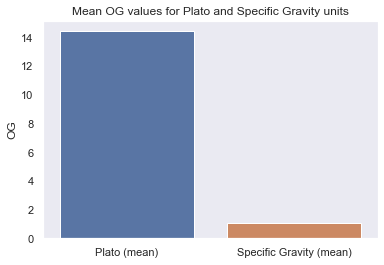

In [78]:
ax = sns.barplot(x = ['Plato (mean)', 'Specific Gravity (mean)'],
            y = 'OG',
            data = df.groupby('SugarScale')[gravity_cols].mean())
ax.set_title('Mean OG values for Plato and Specific Gravity units')

In [79]:
vals = df.groupby('SugarScale')[gravity_cols].mean().values
vals

array([[14.41999151,  3.23146939, 12.00323741],
       [ 1.0598965 ,  1.01336504,  1.04743975]])

Text(0.5, 0.98, 'Range of Plato, SG for Gravity columns')

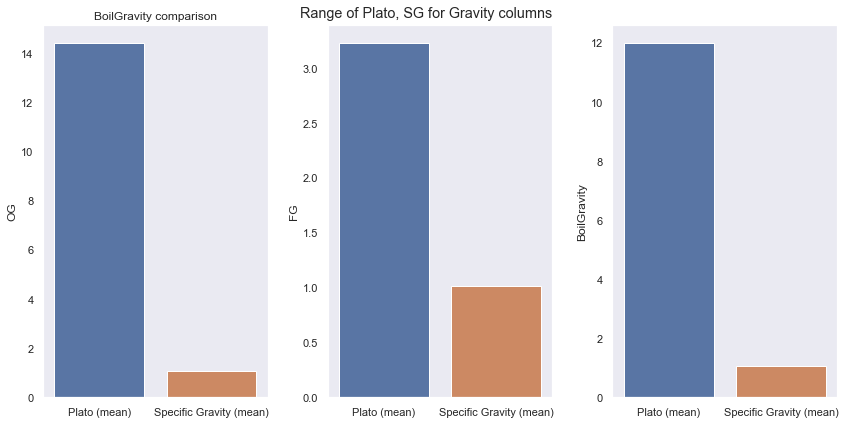

In [80]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12, 6)
x = ['Plato (mean)', 'Specific Gravity (mean)']

sns.barplot(x = x,
            y = 'OG',
            data = df.groupby('SugarScale')[gravity_cols].mean(),
            ax = axes[0])

axes[0].set_title("OG comparison")


sns.barplot(x = x,
            y = 'FG',
            data = df.groupby('SugarScale')[gravity_cols].mean(),
            ax = axes[1])

axes[0].set_title("OG comparison")


sns.barplot(x = x,
            y = 'BoilGravity',
            data = df.groupby('SugarScale')[gravity_cols].mean(),
            ax = axes[2])

axes[0].set_title("OG comparison")
axes[0].set_title("FG comparison")
axes[0].set_title("BoilGravity comparison")

fig.tight_layout()
plt.suptitle("Range of Plato, SG for Gravity columns")

We can clearly see that the measurement scales for Plato and Specific Gravity are different by looking at the mean values

This link provides us with the conversion formula to convert Plato scale to the Specific Gravity scale:

https://www.brewersfriend.com/plato-to-sg-conversion-chart/

In [81]:
def plato_to_sg_convert(plato):
    SG = 1 + (plato / (258.6 - ( (plato/258.2) *227.1) ) )
    return SG

In [82]:
plato_to_sg_convert(40)

1.1790366276211497

In [83]:
# if SugarScale is SpecificGravity, then we keep it as it is. If it is Plato, then we convert
# OG, FG and BoilGravity to the units of Specific Gravity

df['OG_sg'] = df.apply(lambda x: plato_to_sg_convert(x['OG']) if x['SugarScale'] == 'Plato' else x['OG'], axis = 1)
df['FG_sg'] = df.apply(lambda x: plato_to_sg_convert(x['FG']) if x['SugarScale'] == 'Plato' else x['FG'], axis = 1)
df['BoilGravity_sg'] = df.apply(lambda x: plato_to_sg_convert(x['BoilGravity']) if x['SugarScale'] == 'Plato' else x['BoilGravity'], axis = 1)

SugarScale is only a measurement unit indicator as we see in the above analysis. We can be sure that this variable does not really contain useful values that directly correlates to the target variable. We can remove this from our dataset

In [84]:
# now we can drop the older columns of OG, FG, BoilGravity
df.drop(['OG', 'FG', 'BoilGravity'], axis = 1, inplace = True)

In [85]:
df.drop(['SugarScale'], axis = 1, inplace = True)

In [86]:
df.head()

,Unnamed: 0,Id,Size(L),ABV,IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,Efficiency,OG_sg,FG_sg,BoilGravity_sg
0,0,6,18.93,7.45,29.94,5.44,20.82,60,2.00,0.35,26.67,Saison,70.0,1.072,1.015,1.065
1,1,7,21.00,5.41,111.28,5.78,28.50,60,5.00,1.00,19.00,American Pale Ale,65.0,1.050,1.009,1.037
2,2,9,41.64,7.61,70.45,9.29,49.21,60,1.25,0.75,17.78,American IPA,70.0,1.075,1.017,1.064
3,3,14,58.67,6.32,43.17,6.48,71.92,65,1.50,1.00,23.89,Saison,62.0,1.059,1.011,1.048
4,4,15,20.82,7.20,104.21,8.78,28.39,60,1.50,1.25,19.44,American IPA,60.0,1.069,1.014,1.050


Drop the ID column as it does not give us any meaningful information for our regression task.

In [87]:
df.drop(['Id'], axis = 1, inplace = True)

In [88]:
# first column is only a sequential row ID and can be removed 
df.drop(df.columns[0], axis = 1, inplace = True)

In [89]:
# shift the target variable to the end
df = df[ [ col for col in df.columns if col != 'Efficiency' ] + ['Efficiency'] ]

In [90]:
df.head()

,Size(L),ABV,IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,OG_sg,FG_sg,BoilGravity_sg,Efficiency
0,18.93,7.45,29.94,5.44,20.82,60,2.00,0.35,26.67,Saison,1.072,1.015,1.065,70.0
1,21.00,5.41,111.28,5.78,28.50,60,5.00,1.00,19.00,American Pale Ale,1.050,1.009,1.037,65.0
2,41.64,7.61,70.45,9.29,49.21,60,1.25,0.75,17.78,American IPA,1.075,1.017,1.064,70.0
3,58.67,6.32,43.17,6.48,71.92,65,1.50,1.00,23.89,Saison,1.059,1.011,1.048,62.0
4,20.82,7.20,104.21,8.78,28.39,60,1.50,1.25,19.44,American IPA,1.069,1.014,1.050,60.0


In [91]:
# Statistical description of the numerical attributes in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),9099.0,52.409094,197.934651,1.89,20.500,20.820,30.000,5850.000
ABV,9099.0,6.112086,1.361060,0.00,5.270,5.970,6.780,49.960
IBU,9099.0,54.944371,40.279746,0.00,30.360,45.020,67.880,671.670
Color,9099.0,9.923881,8.360675,0.03,5.240,7.100,10.870,50.000
BoilSize,9099.0,60.975811,211.880396,3.03,26.500,28.390,35.980,5850.000
BoilTime,9099.0,66.049896,12.598966,0.00,60.000,60.000,60.000,180.000
MashThickness,9099.0,2.064355,1.635604,0.00,1.400,1.500,2.900,50.000
PitchRate,9099.0,0.696186,0.312178,0.00,0.350,0.750,1.000,2.000
PrimaryTemp,9099.0,19.689260,3.610124,-17.78,18.330,20.000,20.000,85.000
OG_sg,9099.0,1.059861,0.013090,1.00,1.052,1.058,1.066,1.500


Looking at the scale of the input variables, we see a big difference in the mean and std of some variables
in comparison to other variables. The variables BoilSize, BoilTime, Size etc. have a much higher mean and std
when compared to variables like OG_sg, FG_sg etc.

We will have to scale the input features to bring them to a similar scale which will help our regression model
get a better accuracy. This will be done before training phase.

### 1.2 Correlations in the input features




In [92]:
plot_df = df.loc[:, ['OG_sg','FG_sg','BoilGravity_sg','ABV','IBU','Color', 'Efficiency']]

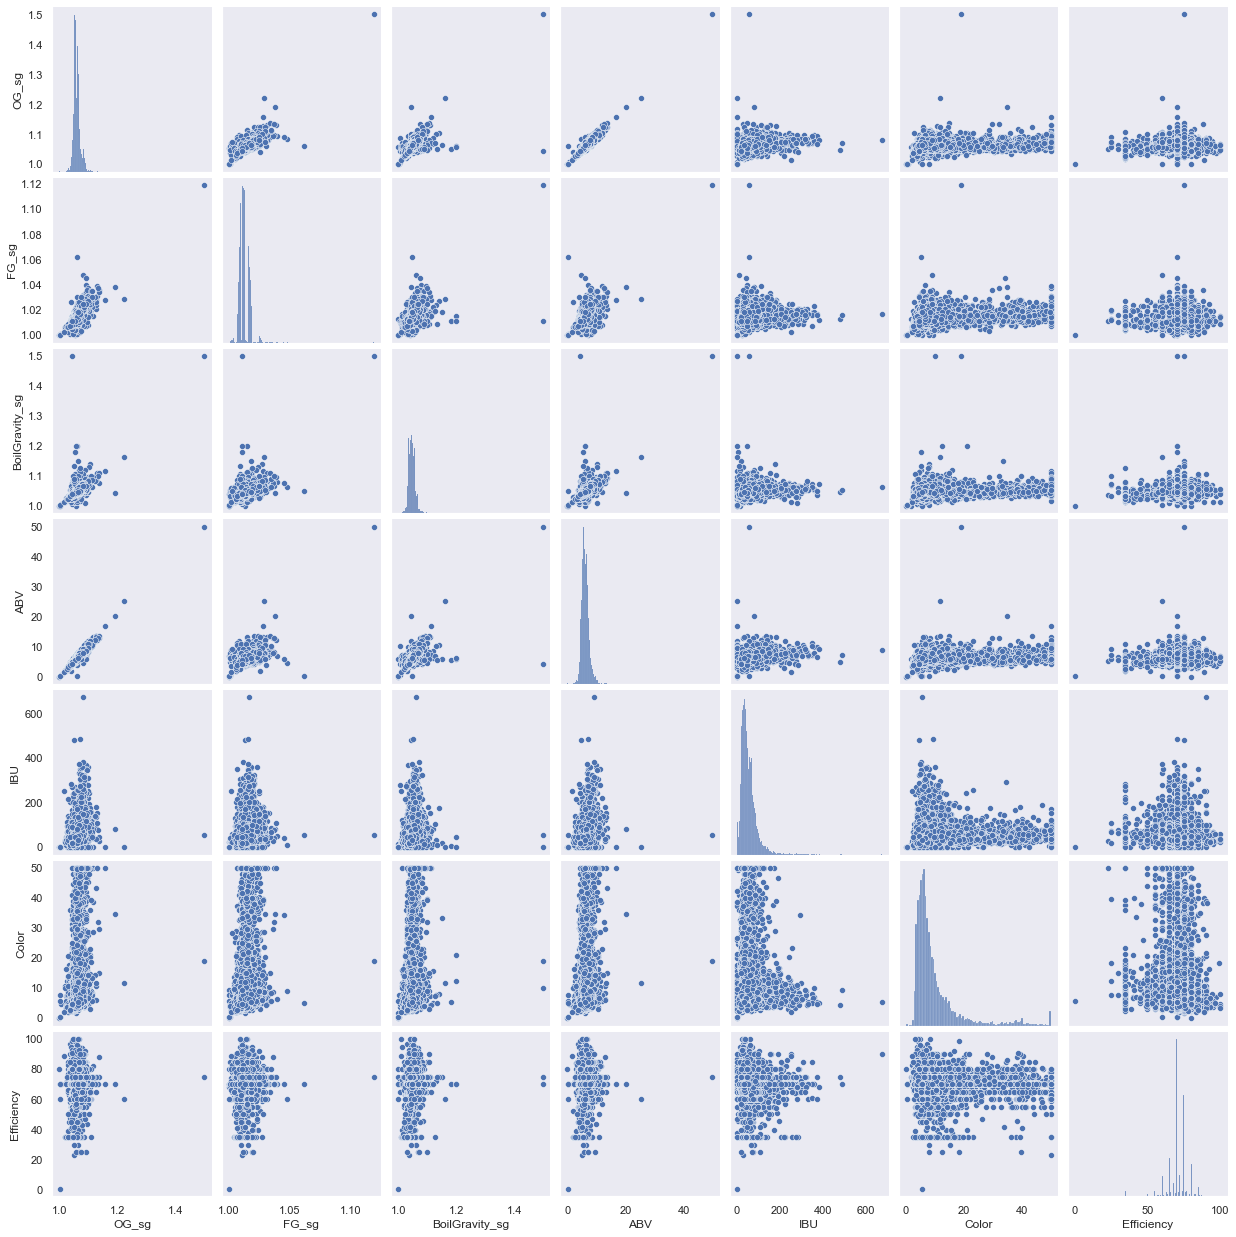

In [93]:
sns.set(style="dark")
sns.pairplot(data=plot_df)
plt.show()

We see a strong linear relation between ABV and OG_sg input features as seen in the linear regression line fit to the data points below

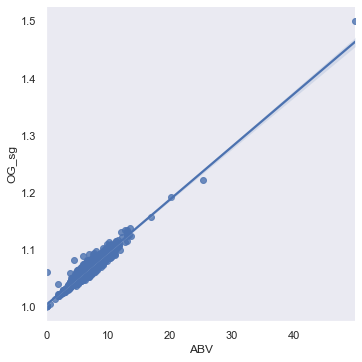

In [94]:
sns.lmplot(x='ABV', y='OG_sg', data=plot_df, n_boot=100)

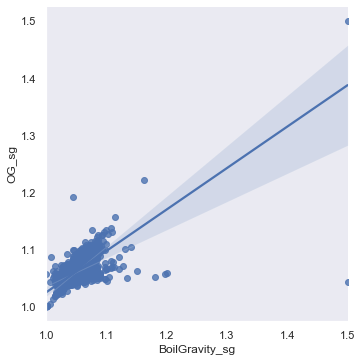

In [95]:
sns.lmplot(x='BoilGravity_sg', y='OG_sg', data=plot_df, n_boot=100)

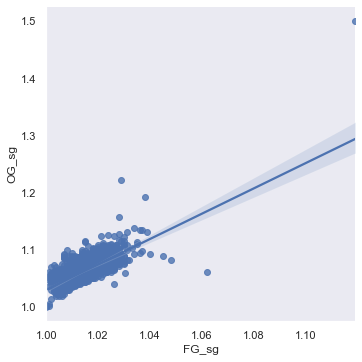

In [96]:
sns.lmplot(x='FG_sg', y='OG_sg', data=plot_df, n_boot=100)

### 1.3 Correlation heatmap of all input features along with the target variable

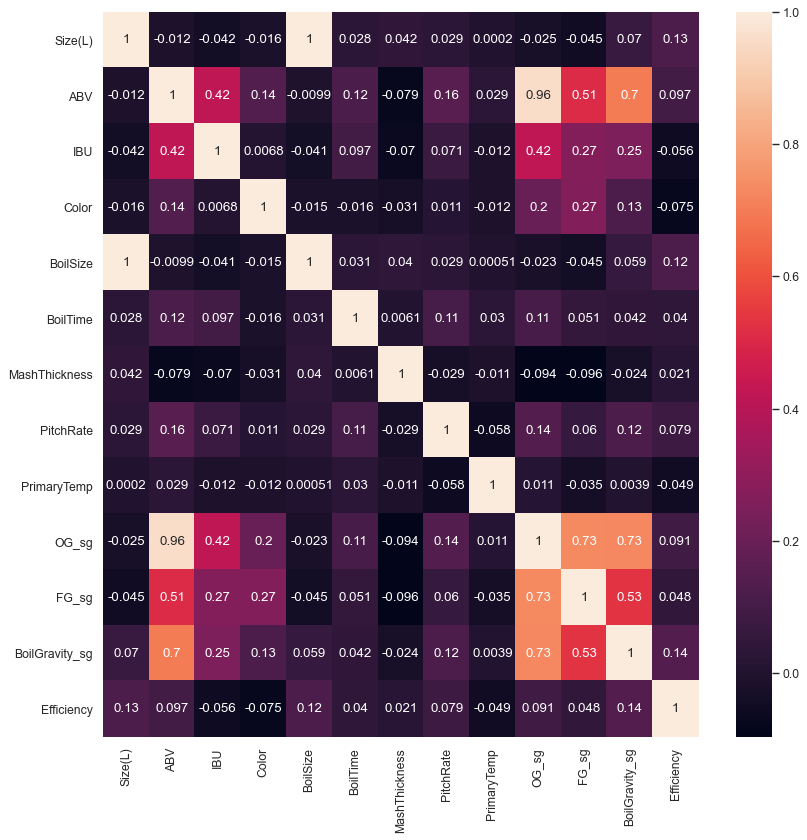

In [97]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12), dpi=80)

heatmap_plot = sns.heatmap(df.corr(), annot = True)

plt.show()

We can see from the above heatmap plot that Efficiency (target variable) has no strong linear correlation with any of the input variables.

### Note:
However, certain input variables have a strong correlation such as ABV - OG_sg; IBU - OG_sg and so on.

We see that ABV and OG_sg are almost perfectly correlated with a correlation coefficient of 0.96.
Likewise, OG_sg has a correlation coefficient of 0.73 with BoilGravity_sg and 0.73 with FG_sg respectively.

Strong correlations will negatively affect the linear models and should be removed.
Such variables will not impact non-linear models like Random forest, XGBoost. However, when selecting the best feature to split the data, one of the two strongly correlated variables will be selected and the unselected variable will be deemed to be unimportant.
To avoid this, it is best to remove strongly correlated variables.

I will **remove ABV and OG_sg variables** from the dataset.

In [98]:
df.drop(['ABV'], axis = 1, inplace = True)

df.drop(['OG_sg'], axis = 1, inplace = True)


In [99]:
df.head()

,Size(L),IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,FG_sg,BoilGravity_sg,Efficiency
0,18.93,29.94,5.44,20.82,60,2.00,0.35,26.67,Saison,1.015,1.065,70.0
1,21.00,111.28,5.78,28.50,60,5.00,1.00,19.00,American Pale Ale,1.009,1.037,65.0
2,41.64,70.45,9.29,49.21,60,1.25,0.75,17.78,American IPA,1.017,1.064,70.0
3,58.67,43.17,6.48,71.92,65,1.50,1.00,23.89,Saison,1.011,1.048,62.0
4,20.82,104.21,8.78,28.39,60,1.50,1.25,19.44,American IPA,1.014,1.050,60.0


# 2. Preprocessing of the data

- Using a label encoding to convert the categorical variables into unique integer values
- Separate the target variable and input features
- Scaling the input features
- Split the data into training and testing sets

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [101]:
df['Style'].value_counts()

American IPA            5042
American Pale Ale       1381
Saison                   549
Blonde Ale               361
American Amber Ale       355
Imperial IPA             320
Irish Red Ale            248
Witbier                  224
American Stout           221
American Brown Ale       216
American Light Lager     182
Name: Style, dtype: int64

### 2.1 Label encoding for the Style variable

In [102]:
# Label encoding of the categorical variable 'Style'

encoder = LabelEncoder()

df['Style'] = encoder.fit_transform(df['Style'])

In [103]:
df.head()

,Size(L),IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,FG_sg,BoilGravity_sg,Efficiency
0,18.93,29.94,5.44,20.82,60,2.00,0.35,26.67,9,1.015,1.065,70.0
1,21.00,111.28,5.78,28.50,60,5.00,1.00,19.00,4,1.009,1.037,65.0
2,41.64,70.45,9.29,49.21,60,1.25,0.75,17.78,2,1.017,1.064,70.0
3,58.67,43.17,6.48,71.92,65,1.50,1.00,23.89,9,1.011,1.048,62.0
4,20.82,104.21,8.78,28.39,60,1.50,1.25,19.44,2,1.014,1.050,60.0


In [104]:
# we see the Style column now contains unique integer values
df['Style'].value_counts()

2     5042
4     1381
9      549
6      361
0      355
7      320
8      248
10     224
5      221
1      216
3      182
Name: Style, dtype: int64

In [105]:
# Split the dataset into input features X and target variable y. Target is the Efficiency column.
X = df[ [ col for col in df.columns if col != 'Efficiency' ]  ]

In [106]:
X.head()

,Size(L),IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,FG_sg,BoilGravity_sg
0,18.93,29.94,5.44,20.82,60,2.00,0.35,26.67,9,1.015,1.065
1,21.00,111.28,5.78,28.50,60,5.00,1.00,19.00,4,1.009,1.037
2,41.64,70.45,9.29,49.21,60,1.25,0.75,17.78,2,1.017,1.064
3,58.67,43.17,6.48,71.92,65,1.50,1.00,23.89,9,1.011,1.048
4,20.82,104.21,8.78,28.39,60,1.50,1.25,19.44,2,1.014,1.050


In [107]:
y = df['Efficiency']

In [108]:
y

0       70.0
1       65.0
2       70.0
3       62.0
4       60.0
        ... 
9094    85.0
9095    75.0
9096    80.0
9097    70.0
9098    70.0
Name: Efficiency, Length: 9099, dtype: float64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)


In [110]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (7279, 11)
X_test.shape :  (1820, 11)
y_train.shape :  (7279,)
y_test.shape :  (1820,)


In [111]:
X_train.head(10)

,Size(L),IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,FG_sg,BoilGravity_sg
7620,24.61,16.80,3.40,28.39,60,1.50,0.75,22.22,2,1.004,1.039
7117,9.46,59.59,6.44,15.14,75,1.50,1.50,21.11,2,1.011,1.047
7520,18.93,22.45,9.12,24.61,60,1.50,0.75,21.11,2,1.012,1.044
8810,19.00,50.31,5.58,28.00,60,2.50,0.35,18.00,2,1.018,1.054
4262,20.82,36.97,6.68,26.88,60,1.50,0.35,20.00,4,1.012,1.042
1544,24.00,40.21,50.00,28.50,60,3.00,0.75,18.00,5,1.014,1.054
9000,21.77,56.39,9.08,26.50,60,1.50,0.75,18.33,2,1.020,1.057
7205,17.03,38.91,10.22,19.68,60,1.40,1.00,19.44,2,1.013,1.047
7501,23.00,64.95,43.41,34.00,60,3.10,0.50,19.00,2,1.010,1.038
8521,24.00,37.17,5.51,27.00,60,4.79,1.00,18.00,2,1.014,1.053


### 2.2 Scaling the input features

As described before, the scale of the input variables has a huge variation. For example, the variables BoilTime, BoilSize have a mean value around 66 and 60 whereas OG, FG have a mean value of around 1.1. Scaling will bring all the values to the same range and will help in reducing bias during training of different models.

Standardization process involves taking every variable and individually transforming the values such that it will have a mean = 0 and standard deviation = 1

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_train_df.head(10)

,Size(L),IBU,Color,BoilSize,BoilTime,MashThickness,PitchRate,PrimaryTemp,Style,FG_sg,BoilGravity_sg
0,-0.138683,-0.955849,-0.782135,-0.151622,-0.478115,-0.407190,0.173955,0.738380,-0.569670,-2.142540,-0.630877
1,-0.213965,0.107413,-0.415251,-0.212959,0.723390,-0.407190,2.573607,0.417237,-0.569670,-0.537347,-0.038636
2,-0.166908,-0.815455,-0.091813,-0.169120,-0.478115,-0.407190,0.173955,0.417237,-0.569670,-0.308034,-0.260726
3,-0.166560,-0.123180,-0.519040,-0.153427,-0.478115,0.350355,-1.105860,-0.482544,-0.569670,1.067846,0.479574
4,-0.157516,-0.454657,-0.386286,-0.158612,-0.478115,-0.407190,-1.105860,0.096093,0.249174,-0.308034,-0.408787
5,-0.141715,-0.374149,4.841814,-0.151113,-0.478115,0.729127,0.173955,-0.482544,0.658597,0.150593,0.479574
6,-0.152796,0.027898,-0.096641,-0.160371,-0.478115,-0.407190,0.173955,-0.387069,-0.569670,1.526473,0.701664
7,-0.176349,-0.406451,0.040941,-0.191942,-0.478115,-0.482945,0.973839,-0.065925,-0.569670,-0.078720,-0.038636
8,-0.146684,0.240600,4.046496,-0.125652,-0.478115,0.804882,-0.625929,-0.193225,-0.569670,-0.766660,-0.704907
9,-0.141715,-0.449688,-0.527488,-0.158056,-0.478115,2.085133,0.973839,-0.482544,-0.569670,0.150593,0.405544


Save the preprocessed arrays as npy files to disk.

In [114]:
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)